## Вычисление метрики (растояния):

**Евклидово** = numpy.linalg.norm(P1-P2)

**Манхэттен** = numpy.linalg.norm(P1 - P2,ord=1)

**max-метрике** = max(numpy.abs(P1-P2))

In [51]:
import numpy as np

dot_1 = np.array([5,5,5])
dot_2 = np.array([3,4,4])

np.linalg.norm(dot_2 - dot_1), np.linalg.norm(dot_2 - dot_1,ord=1), np.max(np.abs(dot_2 - dot_1))

(2.449489742783178, 4.0, 2)

## Нормализация вектора
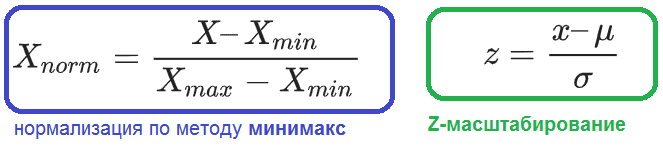

**Ско** = np.std( my_list )

In [7]:
my_arr = np.array([1,0,5,2,2])
min = np.min(my_arr)
max = np.max(my_arr)
std = np.std(my_arr)
mean = np.mean(my_arr)

minmax_arr = (my_arr - min) / (max - min)
z_arr = (my_arr - mean) / std

z_arr, minmax_arr

(array([-0.5976143 , -1.19522861,  1.79284291,  0.        ,  0.        ]),
 array([0.2, 0. , 1. , 0.4, 0.4]))

## Практика

Следующая таблица содержит информацию об оценках, выставленных фильмам.

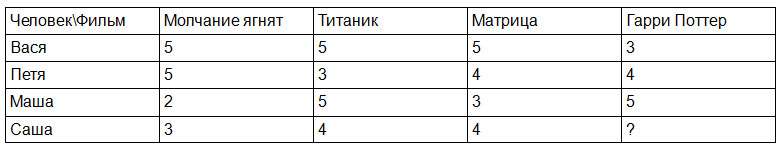

Требуется оценить, какую оценку поставит Саша фильму «Гарри Поттер». Сделаем это с помощью метрики Манхэттен (для простоты вычислений данные в таблице нормировать не нужно). Для этого подсчитаем расстояния от Саши до других людей, используя информацию из первых 3 столбцов. Чему равна ожидаемая оценка для «Гарри Поттера» (округлить до одного знака после запятой)?

**Формула для предсказания с помощью метрики:**
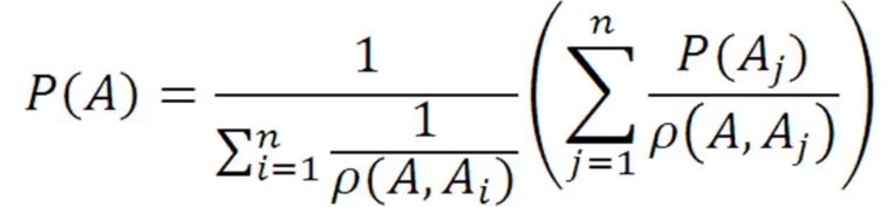


In [43]:
import pandas as pd
import numpy as np
from numpy import NaN

# Создадим датафрейм с пропущенным значением признака Р для объекта А
df = pd.DataFrame({'Молчание ягнят':[5,5,2,3],
                   'Титаник':[5,3,5,4],
                   'Матрица':[5,4,3,4],
                   'Гарри Поттер':[3,4,5,NaN]},
                    index=['Вася', 'Петя', 'Маша', 'Саша'])
df_cut = df.dropna()[['Молчание ягнят', 'Титаник', 'Матрица']]
df_cut

,Молчание ягнят,Титаник,Матрица
Вася,5,5,5
Петя,5,3,4
Маша,2,5,3


In [53]:
sasha = df.dropna(axis=1).loc[['Саша']]
known_val = df['Гарри Поттер'].dropna().values[0]
distanse = np.array([])
print(sasha)
for name in df_cut.index:
  dot_1 = df_cut.loc[name].values
  dot_2 = sasha.values
  print(dot_1, )
  distanse = np.append(distanse, np.linalg.norm(dot_1 - dot_2,ord=1))
print(distanse)
proximity = 1 / distanse
predicted = 1 / np.sum(proximity) * (np.sum(known_val/distanse))

predicted

      Молчание ягнят  Титаник  Матрица
Саша               3        4        4
[5 5 5]	[[3 4 4]]

[5 3 4]	[[3 4 4]]

[2 5 3]	[[3 4 4]]

[2. 2. 1.]


3.0